# 23/CS/301 Piyush Yadav
## Lab 04 (2 hrs) – End-to-End Regression Pipeline
## Learning Outcomes
### By the end of this lab, students will be able to:
- Preprocess numerical features for regression.
- Train and evaluate linear, multiple, and polynomial regression models.
- Compare manual vs library-based implementations.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 3 * X + 2 + np.random.normal(0, 3, 100)

In [23]:
df = pd.DataFrame({'Feature': X, 'Target': y})

In [24]:
scaler = StandardScaler()
df['Feature_scaled'] = scaler.fit_transform(df[['Feature']])

In [25]:
X = df[['Feature_scaled']]
y = df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
X_train_arr = X_train.values.flatten()
y_train_arr = y_train.values

In [28]:
X_mean, y_mean = np.mean(X_train_arr), np.mean(y_train_arr)
beta1 = np.sum((X_train_arr - X_mean) * (y_train_arr - y_mean)) / np.sum((X_train_arr - X_mean) ** 2)
beta0 = y_mean - beta1 * X_mean

In [29]:
y_pred_manual = beta0 + beta1 * X_test.values.flatten()

In [30]:
mse_manual = mean_squared_error(y_test, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)
r2_manual = r2_score(y_test, y_pred_manual)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_multi = lr.predict(X_test)

In [32]:
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

In [33]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_pred_poly = lr_poly.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [34]:
results = pd.DataFrame({
    'Model': ['Manual Linear', 'Multiple Linear', 'Polynomial'],
    'MSE': [mse_manual, mse_multi, mse_poly],
    'RMSE': [rmse_manual, rmse_multi, rmse_poly],
    'R2': [r2_manual, r2_multi, r2_poly]
})

print(results)

             Model       MSE      RMSE        R2
0    Manual Linear  5.598380  2.366090  0.932528
1  Multiple Linear  5.598380  2.366090  0.932528
2       Polynomial  5.576697  2.361503  0.932789


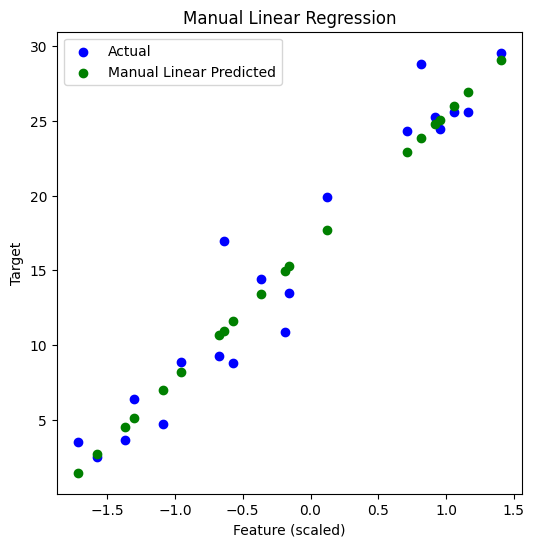

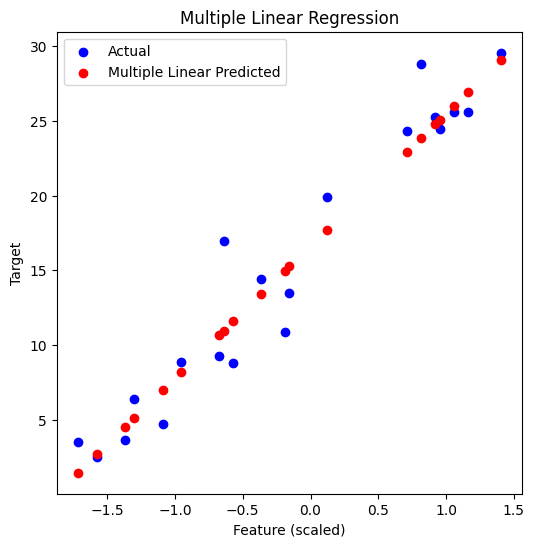

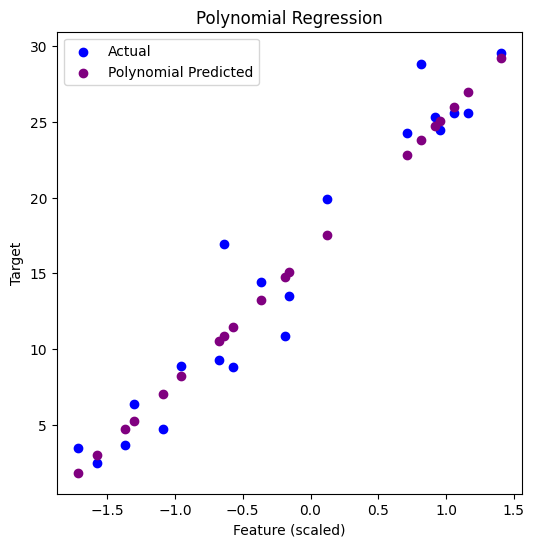

In [35]:
# Manual Linear Regression Plot
plt.figure(figsize=(6,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_manual, color='green', label='Manual Linear Predicted')
plt.xlabel('Feature (scaled)')
plt.ylabel('Target')
plt.title('Manual Linear Regression')
plt.legend()
plt.show()

# Multiple Linear Regression Plot
plt.figure(figsize=(6,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_multi, color='red', label='Multiple Linear Predicted')
plt.xlabel('Feature (scaled)')
plt.ylabel('Target')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

# Polynomial Regression Plot
plt.figure(figsize=(6,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_poly, color='purple', label='Polynomial Predicted')
plt.xlabel('Feature (scaled)')
plt.ylabel('Target')
plt.title('Polynomial Regression')
plt.legend()
plt.show()
